In [4]:
import matplotlib.pyplot as plt
import pandas
import re
from pathlib import Path
import numpy as np
import random
import os



In [2]:
# CSV format:
# example1: CSVScenario-CP1_Session-isr01_2022-05-31-11-44-09.csv
# example2: CSVScenario-CP1_Session-NYC1_2022-07-28-12-13-13.csv

# Sections connected with underscores
# section1: CSVScenario-CP*CrossPathNumber*
# Regex: CSVScenario-CP <-- fixed  || (\d+) <-- try to capture any number of digits (in case there are named like CP01)

# section2: Session-*Location*
# Regex: Session <-- fixed || .+ <-- any number of characters

# section3: Year-Month-Date-Time
# Regex: 4 digits - 2 digits - 2 digits - 2 digits - 2 digits - 2 digits

In [5]:
# get current working directory then set folder path
cwd = os.getcwd()
folder_path = Path(cwd) / 'Data'

# Create a dictionary to store the CP paths
csv_categorized = {}

# Iterate over all csv files
for file in folder_path.rglob('*.csv'):  # "r"glob for recursive
    # Check filename pattern
    filename = file.name
    # (\d+) tries to match and catch any number of digits
    # use https://regex101.com to check and modify regex if file name pattern changes in the future
    match = re.match(r'CSVScenario-CP(\d+)_Session-.+_\d{4}-\d{2}-\d{2}-\d{2}-\d{2}-\d{2}\.csv', filename)
    if match:
        # Use the capture to get get CP number
        crosspath_number = match.group(1)
       
        if crosspath_number not in csv_categorized:
            csv_categorized[crosspath_number] = [file]
        else:
            csv_categorized[crosspath_number].append(file)

# Print categorized csv files
for crosspath_number, files in csv_categorized.items():
    print(f'CP{crosspath_number} - {len(files)} ')
    #for file in files:
        #print(f'  File: {file}')

In [6]:
# pick a random csv from given CP number
def PickRandomFromCP(cp_num):
    if cp_num in csv_categorized:
        return random.choice(csv_categorized[cp_num])
    else:
        raise ValueError(f"No CP {cp_num}")

def DrawIntersectionRandom(CPNum):
    random_csv = PickRandomFromCP(str(CPNum))
    DrawIntersection(random_csv)

def DrawIntersectionFromPath(path):
    DrawIntersection(path)
        
# use plt to draw intersection with constraints
def DrawIntersection(path):
    df = pandas.read_csv(path, sep=';')
    zoomFactor = 50

    wantedDistanceWithin = 35
    
    # LIM for limit --- X>-LIM, X<LIM, Y>-LIN, Y<LIM
    dfA = df[((df['HeadPosXA'] > -wantedDistanceWithin) & (df['HeadPosXA'] < wantedDistanceWithin)) & ((df['HeadPosZA'] > -wantedDistanceWithin) & (df['HeadPosZA'] < wantedDistanceWithin))]
    dfB = df[((df['HeadPosXB'] > -wantedDistanceWithin) & (df['HeadPosXB'] < wantedDistanceWithin)) & ((df['HeadPosZB'] > -wantedDistanceWithin) & (df['HeadPosZB'] < wantedDistanceWithin))]

    plt.plot(dfA['HeadPosXA'], dfA['HeadPosZA'],label="Car A",color = 'red') 
    plt.plot(dfB['HeadPosXB'], dfB['HeadPosZB'],label="Car B", color = 'blue') 

    plt.plot([-wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,wantedDistanceWithin], color='black')
    plt.plot([-wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,wantedDistanceWithin], color='black')
    plt.plot([wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,-wantedDistanceWithin], color='black')
    plt.plot([wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,-wantedDistanceWithin], color='black')

    plt.xlim([-zoomFactor, zoomFactor])
    plt.ylim([-zoomFactor, zoomFactor])
    plt.legend()

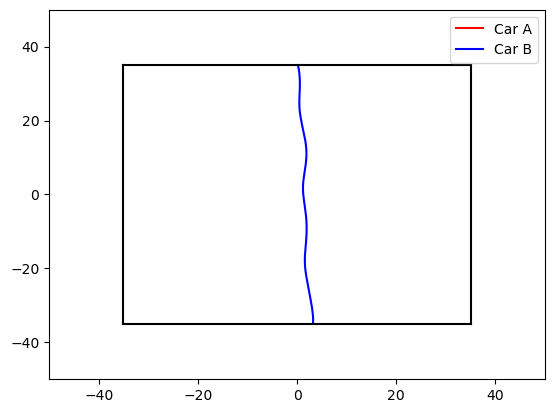

In [9]:
my_path = r"C:\Users\farla\OneDrive\Documents\GitHub\CrossCulturalDataAnalysis\CleanedData\NYC1\DataLogs\csv\CSVScenario-CP1_Session-NYC1_2022-07-28-12-13-13.csv"
DrawIntersectionFromPath(my_path)

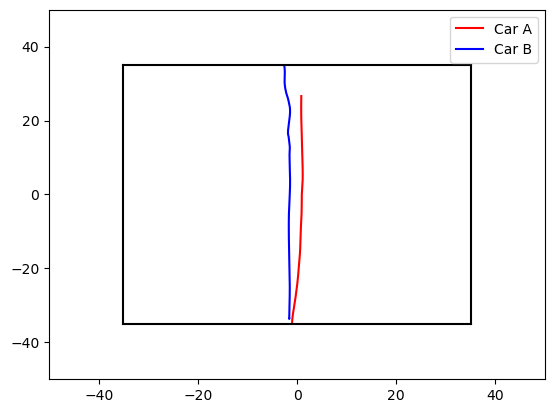

In [7]:
DrawIntersectionRandom(1)

In [ ]:
def DrawAllIntersections(CPNum):
    CPNum = str(CPNum)

    if CPNum not in csv_categorized:
        raise ValueError(f"No CP {CPNum}")

    zoomFactor = 50
    wantedDistanceWithin = 35

    # Prepare the figure
    plt.figure(figsize=(10,10))
   
    # There are some corrupted files so need to try and except
    for path in csv_categorized[CPNum]:
        try:
            df = pandas.read_csv(path, sep=';')        
            # LIM for limit --- X>-LIM, X<LIM, Y>-LIN, Y<LIM
            dfA = df[((df['HeadPosXA'] > -wantedDistanceWithin) & (df['HeadPosXA'] < wantedDistanceWithin)) & ((df['HeadPosZA'] > -wantedDistanceWithin) & (df['HeadPosZA'] < wantedDistanceWithin))]
            dfB = df[((df['HeadPosXB'] > -wantedDistanceWithin) & (df['HeadPosXB'] < wantedDistanceWithin)) & ((df['HeadPosZB'] > -wantedDistanceWithin) & (df['HeadPosZB'] < wantedDistanceWithin))]
            plt.plot(dfA['HeadPosXA'], dfA['HeadPosZA'], color = 'red', alpha=0.5)
            plt.plot(dfB['HeadPosXB'], dfB['HeadPosZB'], color = 'blue', alpha=0.5)
        except Exception as e:
            print(f"Failed to process {path} because of {e}")
            continue

    plt.plot([-wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,wantedDistanceWithin], color='black')
    plt.plot([-wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,wantedDistanceWithin], color='black')
    plt.plot([wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,-wantedDistanceWithin], color='black')
    plt.plot([wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,-wantedDistanceWithin], color='black')

    plt.xlim([-zoomFactor, zoomFactor])
    plt.ylim([-zoomFactor, zoomFactor])
    plt.title(f"All Intersections for CP{CPNum}")
    plt.show()

Failed to process C:\Users\farla\Documents\Summer2023\XCData\CrossCultureResearch\NYC34\csv\CSVScenario-CP1_Session-NYC34_2022-11-21-09-18-51.csv because of '>' not supported between instances of 'str' and 'int'
Failed to process C:\Users\farla\Documents\Summer2023\XCData\CrossCultureResearch\NYC42\csv\CSVScenario-CP1_Session-NYC42_2022-12-02-16-14-47.csv because of 'HeadPosXA'
Failed to process C:\Users\farla\Documents\Summer2023\XCData\CrossCultureResearch\Pilot Study Data\test-runs\33\csv\CSVScenario-CP1_Session-33_2022-05-15-18-20-31.csv because of '>' not supported between instances of 'str' and 'int'
Failed to process C:\Users\farla\Documents\Summer2023\XCData\CrossCultureResearch\Pilot Study Data\test-runs\33\csv\CSVScenario-CP1_Session-33_2022-05-15-18-25-56.csv because of '>' not supported between instances of 'str' and 'int'
Failed to process C:\Users\farla\Documents\Summer2023\XCData\CrossCultureResearch\Pilot Study Data\test-runs\33\csv\CSVScenario-CP1_Session-33_2022-05-18

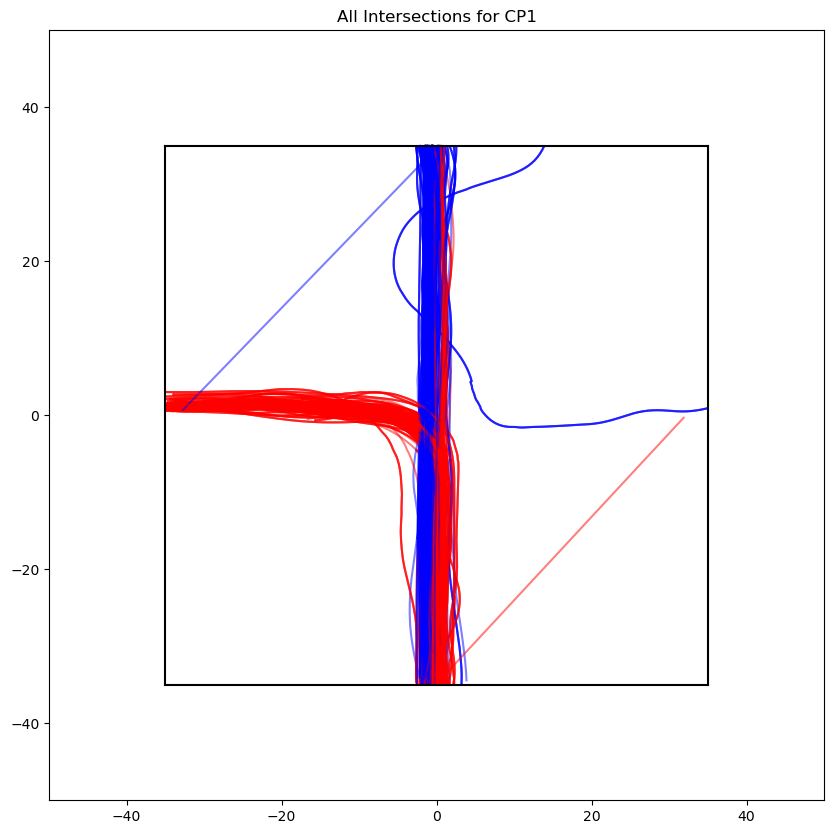

In [8]:
DrawAllIntersections(1)